# 3- Sentiment Analysis

**Sentiment analysis** (or **opinion mining**) is a **<a href="https://github.com/Tanerrr/Natural-Language-Processing">natural language processing </a>** technique used to interpret and classify emotions in subjective data. Sentiment analysis is often performed on textual data to detect sentiment in emails, survey responses, social media data, and beyond.

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

If you want to get more information about Sentiment Analysis, i can advice the article below.

https://monkeylearn.com/sentiment-analysis/

The analyzes we have done so far could also be done for numerical data. At this point, we should use 'Sentiment Analysis' techniques to draw meaningful conclusions from speech transcripts.Some important points for this;

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.



In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_csv('corpus.csv', index_col=[0])
data

,speeches
Erdogan,i wholeheartedly greet our provinces as well ...
Macron,dear friends we are here for this general asse...
Merkel,ladies and gentlemen nearly years ago walter ...
Nicolas_Maduro,ambassadors heads of delegations of the countr...
Obama,my fellow citizens i stand here today humbled ...
Putin,citizens of russia members of the federation c...
Trudeau,before i begin it wont surprise you that my re...
Trump,madam speaker mr vice president members of con...
Xi_Jinping,ladies and gentlemen friends september has jus...
Yoshihide_Suga,i am truly delighted to meet you all students ...


In [2]:
# In order to find the polarity and subjectivity of each speech, create lambda functions.
# # !python -m textblob.download_corpora
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['speeches'].apply(pol)
data['subjectivity'] = data['speeches'].apply(sub)
data

,speeches,polarity,subjectivity
Erdogan,i wholeheartedly greet our provinces as well ...,0.203802,0.519249
Macron,dear friends we are here for this general asse...,0.140230,0.400197
Merkel,ladies and gentlemen nearly years ago walter ...,0.149071,0.412992
Nicolas_Maduro,ambassadors heads of delegations of the countr...,0.102291,0.363904
Obama,my fellow citizens i stand here today humbled ...,0.076578,0.473290
Putin,citizens of russia members of the federation c...,0.118268,0.486168
Trudeau,before i begin it wont surprise you that my re...,0.152746,0.445812
Trump,madam speaker mr vice president members of con...,0.092275,0.445142
Xi_Jinping,ladies and gentlemen friends september has jus...,0.146719,0.374079
Yoshihide_Suga,i am truly delighted to meet you all students ...,0.103095,0.305509


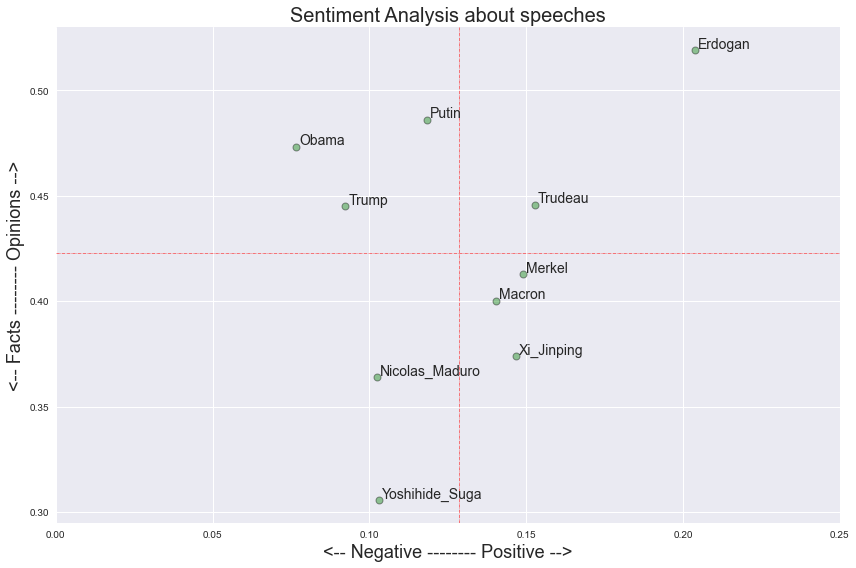

In [42]:
# Let's plot the polarity and subjectivity values
import matplotlib.pyplot as plt


plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 8]

for index, president in enumerate(data.index):
    x = data.polarity.loc[president]
    y = data.subjectivity.loc[president]
    plt.scatter(x, y, edgecolor='black', c='green', linewidth=1, alpha=0.40)
    plt.text(x+.001, y+.001, data.index[index], fontsize=14)
    plt.xlim(0, .25)

plt.title('Sentiment Analysis about speeches', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=18)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=18)
plt.axhline(y=data.subjectivity.mean(axis = 0), xmin=0.0, xmax=1.0, linewidth='0.5', linestyle='-.', color='r')
plt.axvline(x=data.polarity.mean(axis = 0), ymin=0.0, ymax=1, linewidth='0.5', linestyle='-.', color='r')

plt.tight_layout()

plt.show()
